<h1> Can a computer guess what is the type of a star?</h1> 
Barrulik - 4/4/2022


My data set:
https://www.kaggle.com/deepu1109/star-dataset

# Importing data set

The data set has the following inputs:

Temperature - The temperature of the star.

Luminosity - The luminosity of the star.

Radius - The radius of the star.

Absolute magnitude - A measure of the luminosity of a celestial object, on an inverse logarithmic astronomical magnitude scale.

Star color - The color of the star.

Star type - The type of the star.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/stars.csv") # Importing the dataset file and
df.head() # making sure file exists

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
df.describe().transpose() # Allows me to see the values range

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [ ]:
df.info() # checking if there are nulls/objects so I know what will i have to deal with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Editing the data

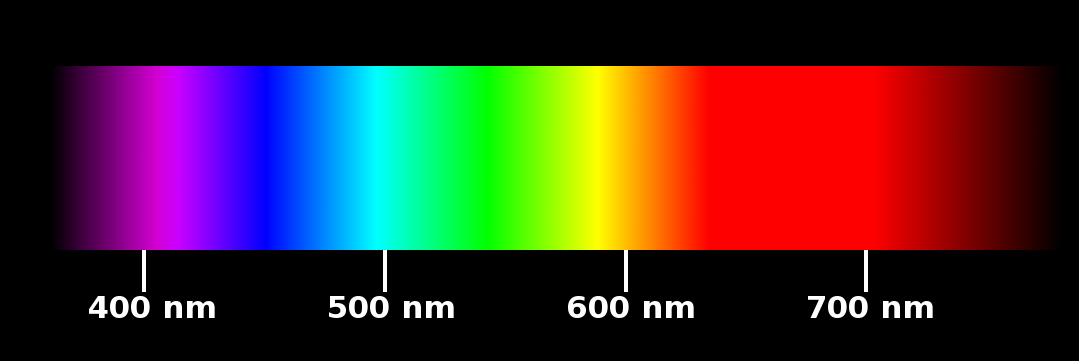

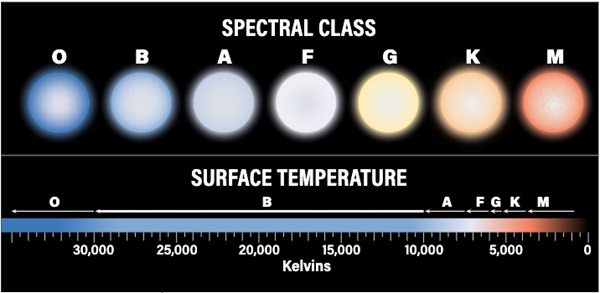

I have sorted all the objects using those spectrums, The color spectrum and the spectral class spectrum.

I related my data to the spectrums because there a numerical order exists.

In [ ]:
df['Star color']=df['Star color'].replace(
    {'Blue':0,'Blue ':0, 
     'Blue White': 1, 'Blue white ':1, 'Blue white':1, 'Blue-White':1, 'Blue-white': 1, 
     'White':2, 'white': 2, 'Whitish':2, 
     'White-Yellow':3, 'Yellowish': 3, 'Yellowish White':3,'yellow-white':3, 'yellowish': 3, 
     'Orange':4, 'Orange-Red':4, 
     'Pale yellow orange':5, 
     'Red': 6})
df['Spectral Class']=df['Spectral Class'].replace({'O':0,'B':1, 'A':2, 'F':3, 'G':4, 'K':5, 'M': 6})


# Converting data to numerical

In [ ]:
df.corr()[["Star type"]].transpose() # Checking corrilation

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Star type,0.411129,0.676845,0.660975,-0.955276,1.0,-0.445471,-0.461116


# Graphs

In [ ]:
df['Star type']=df['Star type'].replace({0:'Brown Dwarf',1:'Red Dwarf',2:'White Dwarf',3:'Main Sequence',4:'Supergiant',5:'Hypergiant'})
# Converting data to names so it will be easier to understand

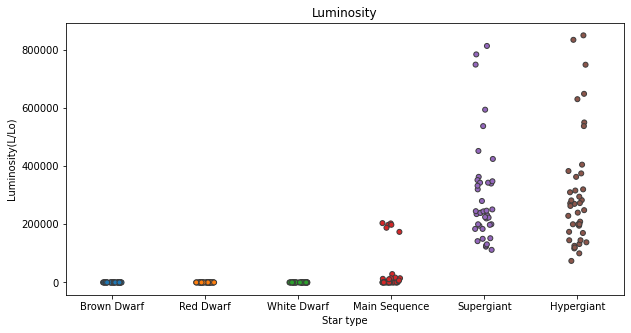

In [ ]:
plt.figure(figsize=(10,5)) # Spacing
plt.title("Luminosity") # Title
sns.stripplot(x=df["Star type"], y=df["Luminosity(L/Lo)"], linewidth=1)

Using that graph, we can learn that only stars with Luminosity above 0 can be from the following types: Main Sequences/Super Giants/Hyper Giants.

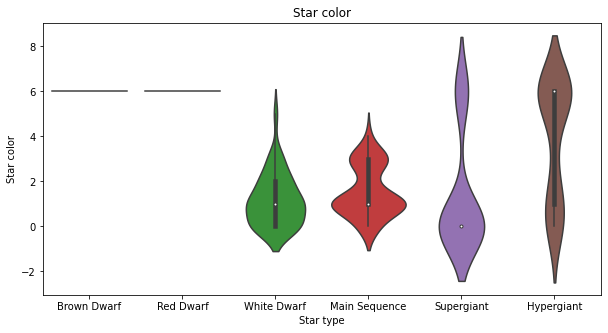

In [ ]:
plt.figure(figsize=(10,5)) # Spacing
plt.title("Star color") # Title
sns.violinplot(x=df["Star type"], y=df["Star color"])

In this graph, we can see that the different colors distinguishes between red dwarf and brown dwarf to the other stars.

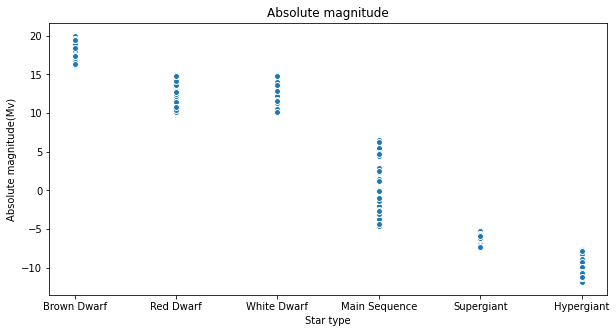

In [ ]:
plt.figure(figsize=(10,5)) # Spacing
plt.title("Absolute magnitude") # Title
sns.scatterplot(x=df['Star type'], y=df["Absolute magnitude(Mv)"], linewidth=1)

Here, we can see that each star type has its own absolute magnitude range except from the red/white dwarfs which has the same magnitude.

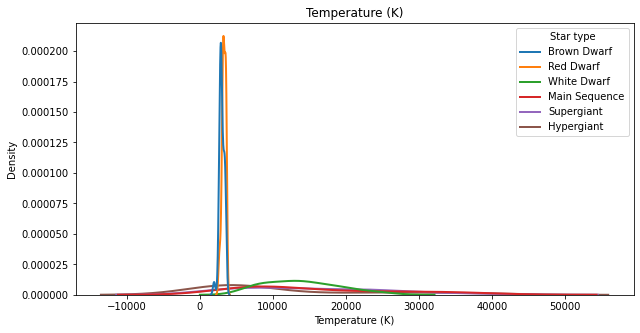

In [ ]:
plt.figure(figsize=(10,5)) # Spacing
plt.title("Temperature (K)") # Title
sns.kdeplot(x=df['Temperature (K)'], hue=df["Star type"], linewidth=2)

This graph shows us that we can distinguish between the red dwarf and the brown dwarf by their color.

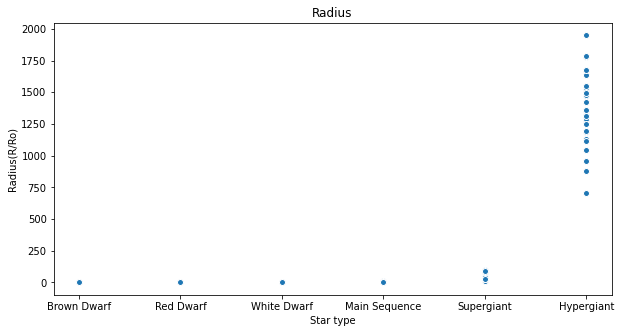

In [ ]:
plt.figure(figsize=(10,5)) # Spacing
plt.title("Radius") # Title
sns.scatterplot(x=df['Star type'], y=df['Radius(R/Ro)'], linewidth=1)

Here we can see that Hypergiants are really big comparing to the other planets, and that super giants are bigger then the other options but the hypergiants.

In [ ]:
df['Star type']=df['Star type'].replace({'Brown Dwarf':0,'Red Dwarf':1,'White Dwarf':2,'Main Sequence':3,'Supergiant':4,'Hypergiant':5})
# Converting the data back to numbers

# Preparation

In [ ]:
print('Star type\n{}'.format(df['Star type'].value_counts())) # Making sure that we have the same amount of every star so there is no need to balance anything

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffling the data frame
df # Printing it to make sure that its shuffled

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,16500,0.01300,0.014,11.890,2,1,1
1,2637,0.00073,0.127,17.220,0,6,6
2,4980,0.35700,1.130,4.780,3,3,5
3,33421,352000.00000,67.000,-5.790,4,0,0
4,11096,112000.00000,12.000,-5.910,4,0,0
...,...,...,...,...,...,...,...
235,24630,363000.00000,63.000,-5.830,4,0,0
236,2650,0.00060,0.140,11.782,1,6,6
237,4077,0.08500,0.795,6.228,3,3,5
238,24490,248490.00000,1134.500,-8.240,5,1,1


# Training begins

In [ ]:
X = df.drop(['Star type'],axis=1) # Making an array of inputs
y = df['Star type'].to_numpy() # Making an array of results
print("start: ", X.shape, y.shape) # Making sure both have same length

start:  (240, 6) (240,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) # Extracting test data out of original dataset
print("train: ", X_train.shape, y_train.shape) # Making sure shapes are good
print("test: ", X_test.shape, y_test.shape) # Making sure shapes are good

train:  (192, 6) (192,)
test:  (48, 6) (48,)


In [ ]:
scaler = MinMaxScaler()
print('before scaling:')
print('Max: ', X_train.max()) # Checking max before
print('Min: ', X_train.min()) # Checkign min before


X_train = scaler.fit_transform(X_train) # Scaling x training values between 0 and 1
X_test = scaler.fit_transform(X_test) # Scaling x testing values between 0 and 1

print('\nEverything has been scaled between 1 and 0')
print('Max: ', X_train.max()) # Checking max after
print('Min: ', X_train.min()) # Checking min after

before scaling:
Max:  Temperature (K)            40000.00
Luminosity(L/Lo)          834042.00
Radius(R/Ro)                1783.00
Absolute magnitude(Mv)        20.02
Star color                     6.00
Spectral Class                 6.00
dtype: float64
Min:  Temperature (K)           2600.00000
Luminosity(L/Lo)             0.00008
Radius(R/Ro)                 0.00840
Absolute magnitude(Mv)     -11.92000
Star color                   0.00000
Spectral Class               0.00000
dtype: float64

Everything has been scaled between 1 and 0
Max:  1.0
Min:  0.0



# Training and evaluation

In [ ]:
# Looking for the best k near neighbors combination



best_knn = KNeighborsClassifier(n_neighbors = 1)
best_knn.fit(X_train, y_train)
best_knn_score = best_knn.score(X_test,y_test)

for k in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  knn_score = knn.score(X_test,y_test)
  print("k = {} score test = {}".format(k, knn_score))
  if knn_score > best_knn_score:
    best_knn = knn
    best_knn_score = knn_score

k = 2 score test = 1.0
k = 3 score test = 0.9791666666666666
k = 4 score test = 1.0
k = 5 score test = 1.0
k = 6 score test = 1.0
k = 7 score test = 0.9583333333333334
k = 8 score test = 0.9375
k = 9 score test = 0.9375


In [ ]:
# Making the confusion matrix
pred1 = best_knn.predict(X_test)
cm = confusion_matrix(pred1,y_test)
cm

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  6]])

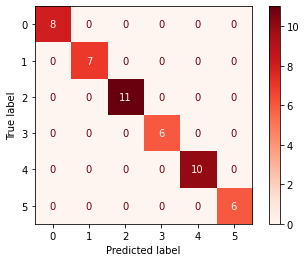

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d", cmap="Reds") # Drawing the confusion matrix on heat map plot

In [ ]:
print(classification_report(pred1, y_test, digits=4)) # Checking the performance of the network

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         8
           1     1.0000    1.0000    1.0000         7
           2     1.0000    1.0000    1.0000        11
           3     1.0000    1.0000    1.0000         6
           4     1.0000    1.0000    1.0000        10
           5     1.0000    1.0000    1.0000         6

    accuracy                         1.0000        48
   macro avg     1.0000    1.0000    1.0000        48
weighted avg     1.0000    1.0000    1.0000        48



precision - true_positive/(true_positive+false_positive).

recall - true_positive/(true_positive+false_negative).

f1 score - the measure the test's accuracy. (2\*precision*recall/(precision+recall))


| Star ID | 0 | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Star Type | Brown Dwarf | Red Dwarf | White Dwarf | Main Sequence | Supergiant | Hypergiant |

# Bibliography
Great explanation about knn:
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Wikipedia:
https://en.wikipedia.org/

<h3>Contact me</h3>
My mail: Barrulik@gmail.com

My projects: https://github.com/barrulik